# 6.1 a)


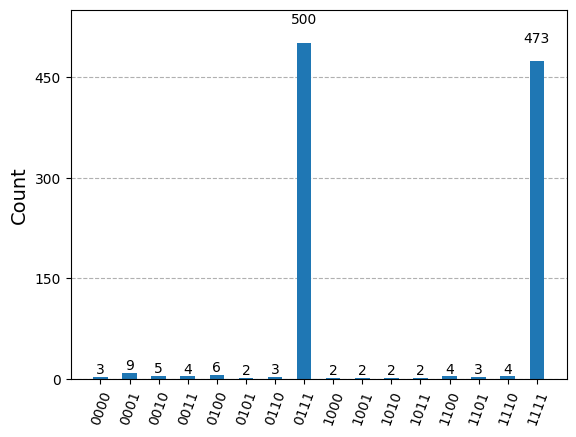

In [22]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc = QuantumCircuit(4, 0)
qc.x(3)
qc.h(range(4))


def add_grover():
    qc.barrier()
    qc.mcx([0, 1, 2], 3)
    qc.h(range(3))
    qc.x(range(3))
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x(range(3))
    qc.h(range(3))


for _ in range(2):
    add_grover()

qc.measure_all()

sim = AerSimulator()
result = sim.run(qc).result()
plot_histogram(result.get_counts(0))

# 6.1 b)


$ N = 8 $

$ \lfloor \frac \pi4 \sqrt{\frac Nk} \rfloor = 2 $


# 6.2 a)


$|\psi_1\rangle = H_3(|x\rangle |y\rangle) = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle)$

$|\psi_1\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) \otimes \frac{(|0\rangle - |1\rangle)}{\sqrt{2}} = \frac{1}{2\sqrt{2}}(|000\rangle - |001\rangle + |010\rangle - |011\rangle + |100\rangle - |101\rangle + |110\rangle - |111\rangle)$


# 6.2 b)


$|\psi_2\rangle = \frac{1}{2\sqrt{2}}(|000\rangle - |001\rangle + |010\rangle - |011\rangle + |100\rangle - |101\rangle + |110\rangle + |111\rangle)$


# 6.2 c)


$| \psi_3\rangle = (I \otimes I \otimes X) (I \otimes I \otimes X) (Z \otimes Z \otimes I) $


# 6.3 a)


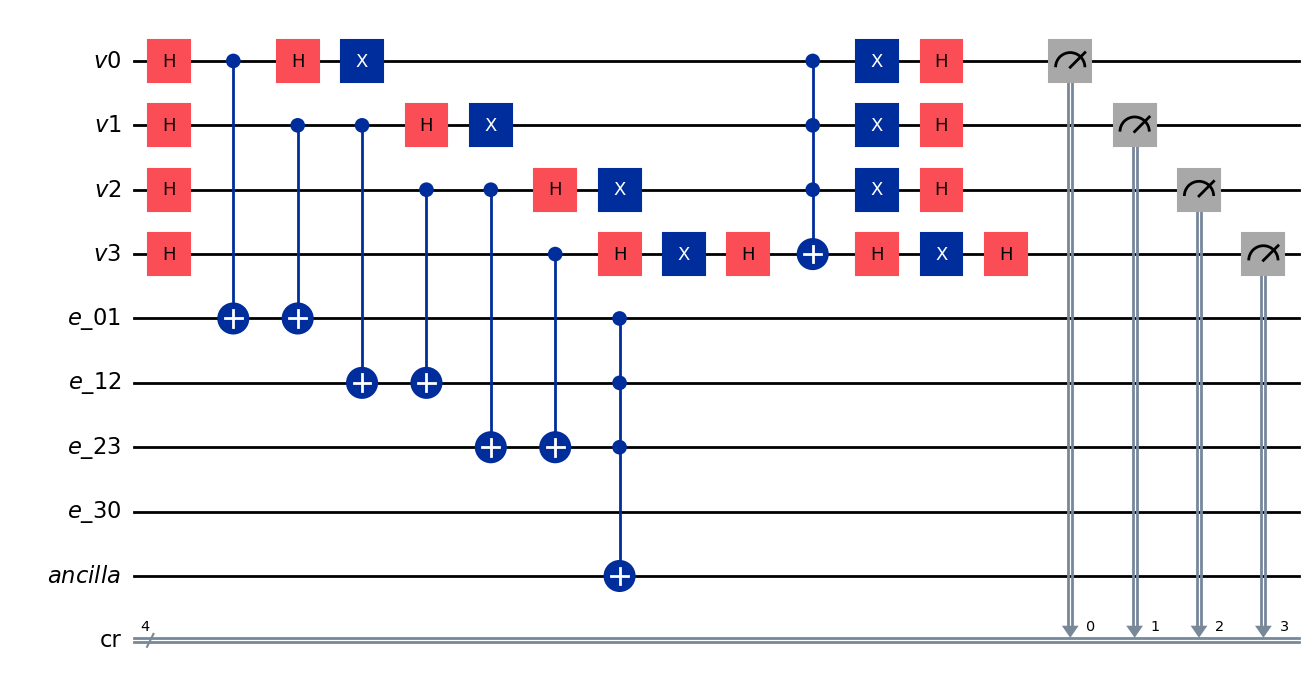

In [20]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(
    QuantumRegister(1, "v0"),
    QuantumRegister(1, "v1"),
    QuantumRegister(1, "v2"),
    QuantumRegister(1, "v3"),
    QuantumRegister(1, "e_01"),
    QuantumRegister(1, "e_12"),
    QuantumRegister(1, "e_23"),
    QuantumRegister(1, "e_30"),
)

qc.h(range(4))
qc.cx(0, 4)
qc.cx(1, 4)
qc.cx(1, 5)
qc.cx(2, 5)
qc.cx(2, 6)
qc.cx(3, 6)


ancilla = QuantumRegister(1, "ancilla")
qc.add_register(ancilla)
qc.mcx([4, 5, 6], ancilla[0])


def apply_grover_diffuser(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mcx(qubits[:-1], qubits[-1])
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)


apply_grover_diffuser(qc, [0, 1, 2, 3])

cr = ClassicalRegister(4, "cr")
qc.add_register(cr)
qc.measure([0, 1, 2, 3], cr)

qc.draw(output="mpl")

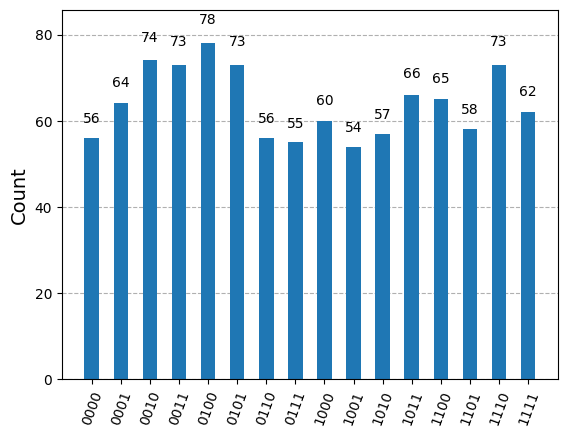

In [21]:
sim = AerSimulator()
result = sim.run(qc).result()
plot_histogram(result.get_counts(0))